# **Importing Required Python Libraries**

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# **Loading Dataset**

In [2]:
from google.colab import files

In [7]:
uploaded=files.upload()

Saving train.csv to train.csv


In [8]:
news_dataset=pd.read_csv('train.csv')

# **Pre-Processing**

In [9]:
news_dataset.shape

(20800, 5)

In [ ]:
# print the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


<ipython-input-49-a96cba65914d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data = news_dataset, palette = 'mako',saturation = 1)


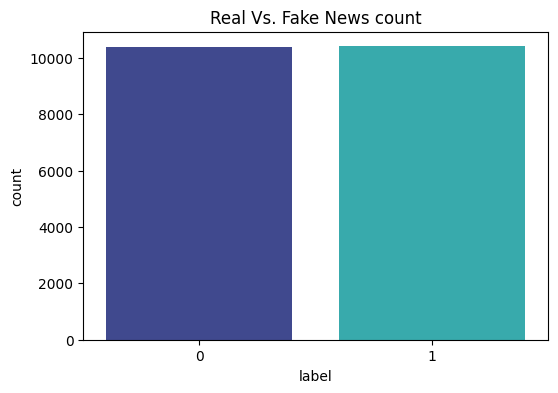

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x='label', data = news_dataset, palette = 'mako',saturation = 1)
plt.title("Real Vs. Fake News count", fontsize = 12)
plt.show()

In [10]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [11]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [12]:
# merging the author name and news title
news_dataset['text'] = news_dataset['author']+' '+news_dataset['title']
print(news_dataset['text'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: text, Length: 20800, dtype: object


In [13]:
# separating the data & label
news_dataset = news_dataset.sample(n=500)
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']
print(X)
print(Y)

          id                                              title  \
921      921  Review: In ‘Warcraft,’ Orcs of a Different Dom...   
9558    9558  Таиланд между ТТП и ЕАЭС | Новое восточное обо...   
1999    1999  From Bad to Worse: Obama’s Ransom Payment to I...   
15116  15116  Susan Rice, Ex-Obama Adviser, Is Back in Polit...   
10462  10462  House to Vote on Heathcare Bill Thursday - Bre...   
...      ...                                                ...   
7637    7637  By Announcing New Jobs, Corporations Help Them...   
3704    3704  Report: Manchester Bomber’s Father Former al-Q...   
2688    2688  Gingrich: Mueller Hiring ’Bad People’ Who Are ...   
10768  10768  Hans Rosling, Swedish Doctor and Pop-Star Stat...   
5249    5249  Emboldened by Trump, Israel Approves a Wave of...   

                                   author  \
921                        Manohla Dargis   
9558                                        
1999                        Ari Lieberman   
15116          

In [14]:
port_stem = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content
news_dataset['text'] = news_dataset['text'].apply(stemming)
print(news_dataset['text'])

921      manohla dargi review warcraft orc differ domai...
9558                                                      
1999     ari lieberman bad wors obama ransom payment ir...
15116    peter baker susan rice ex obama advis back pol...
10462    sean moran hous vote heathcar bill thursday br...
                               ...                        
7637     nelson schwartz bill vlasic announc new job co...
3704     breitbart london report manchest bomber father...
2688     pam key gingrich mueller hire bad peopl trump ...
10768    sam robert han rosl swedish doctor pop star st...
5249     isabel kershner embolden trump israel approv w...
Name: text, Length: 500, dtype: object


In [15]:
#separating the data and label
X = news_dataset['text'].values
Y = news_dataset['label'].values
print(X)
print(Y)

['manohla dargi review warcraft orc differ domain fight heart new york time'
 '' 'ari lieberman bad wors obama ransom payment iran tip iceberg'
 'peter baker susan rice ex obama advis back polit cross hair surveil new york time'
 'sean moran hous vote heathcar bill thursday breitbart'
 'awr hawkin report trump sign repeal obama social secur gun ban breitbart'
 'sausag machin someon broke skype spam bot type emoji transcript happen robot go mad'
 'tfpp writer predict dem next move meme'
 'v saxena obamacar architect admit live tv obamacar design'
 'zahra nader rod nordland mob kill elop lover storm afghan polic station new york time'
 'jeff poor krauthamm trump tax return issu dead parrot breitbart'
 'karen crous tee time trump pro golfer say absolut new york time'
 'america trump support may lure florida wall us govern maintain peac transfer power elect'
 'simon romero nichola casey chapecoens soccer team plane crash leav brazil devast new york time'
 'brook barn gwyneth paltrow goop g

In [ ]:
Y.shape

(500,)

# **Vectorizing**

In [16]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)
print(X)

  (0, 2517)	0.11637353269129307
  (0, 2438)	0.337885166553049
  (0, 2287)	0.11425914114141969
  (0, 1873)	0.30198333082409373
  (0, 1589)	0.337885166553049
  (0, 1522)	0.111567865660644
  (0, 1365)	0.337885166553049
  (0, 994)	0.337885166553049
  (0, 802)	0.31688393894455924
  (0, 631)	0.337885166553049
  (0, 597)	0.29042552124491217
  (0, 538)	0.337885166553049
  (2, 2505)	0.3237647758623605
  (2, 2292)	0.30854061504056696
  (2, 1807)	0.34522202539082814
  (2, 1640)	0.34522202539082814
  (2, 1558)	0.22608346348230057
  (2, 1296)	0.34522202539082814
  (2, 1116)	0.2656261159836316
  (2, 1062)	0.34522202539082814
  (2, 168)	0.28708336551209934
  (2, 121)	0.34522202539082814
  (3, 2517)	0.1063975162899569
  (3, 2287)	0.10446437905360804
  (3, 2215)	0.28971934834459157
  :	:
  (498, 2221)	0.3136018907052814
  (498, 2153)	0.33438560321242305
  (498, 2147)	0.29885561200526184
  (498, 1949)	0.3136018907052814
  (498, 1917)	0.33438560321242305
  (498, 1899)	0.2470020194276257
  (498, 1704)	0.3

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)
print(Y_test)

[1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0
 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0
 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1]


# **With Package Implementation**

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
rfc_pred=rfc.predict(X_test)
print(classification_report(Y_test,rfc_pred))


              precision    recall  f1-score   support

           0       0.98      0.92      0.95        50
           1       0.92      0.98      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



Confusion Matrix:
 [[46  4]
 [ 1 49]]


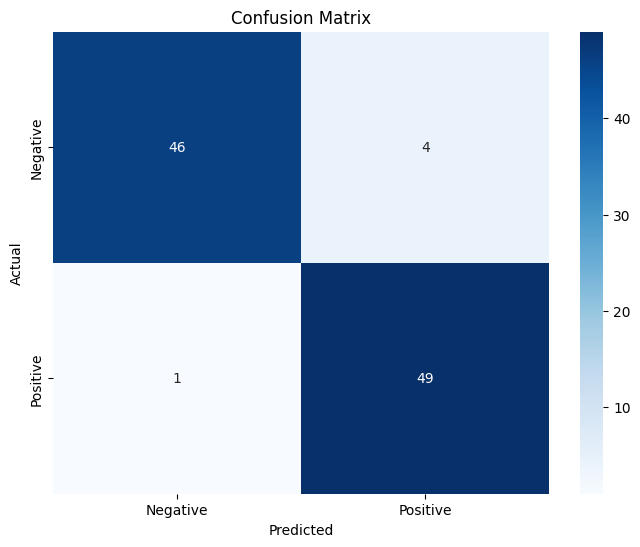

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,rfc_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Without Package Implementation**

In [21]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)




In [22]:
# from DecisionTree import DecisionTree
# import numpy as np
# from collections import Counter

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_feature
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split,
                            n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

In [23]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
#print(X1_train)
#converting sparse matrix (csr_matrix) to array
X1_train = X1_train.toarray()
X1_test = X1_test.toarray()
print(X1_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest(n_trees=20)
clf.fit(X1_train, y1_train)
predictions = clf.predict(X1_test)

acc =  accuracy(predictions,y1_test)
print(acc)

0.95


Confusion Matrix:
 [[44  4]
 [ 1 51]]


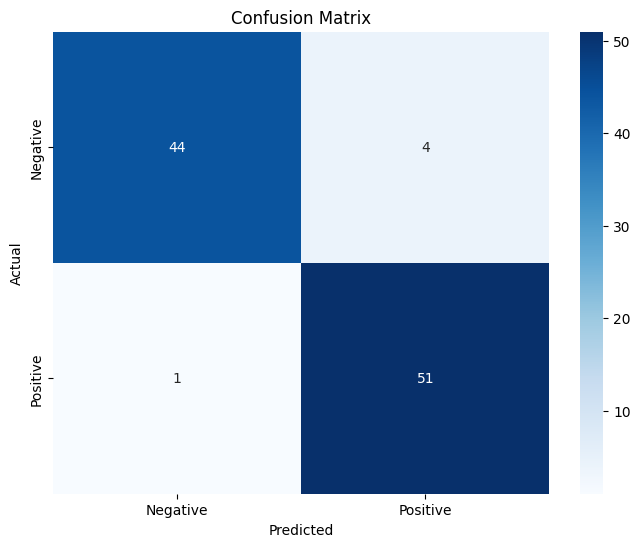

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, predictions)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(predictions)

[1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1
 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0
 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1]


# **Manual Testing**

In [27]:
def manual_forest_prediction():
    # Taking input of any news in form of text
    X = input("ENTER A NEWS FOR PREDICTION: ")
    # Apply stemming to the input text
    X_new = stemming(X)

    # Vectorize the stemmed textvectorizer.fit(X)
    X = vectorizer.transform([X_new])
    X = X.toarray()

    # Make the prediction
    prediction = clf.predict(X)
    if (prediction==0):
     print('The news is Real '+prediction)
    else:
     print('The news is Fake',prediction)

# Example usage
manual_forest_prediction()

ENTER A NEWS FOR PREDICTION: dakota did not access versu american way
The news is Fake [1]
